<a href="https://colab.research.google.com/github/arturoTellez/AA_MCIC/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Cargamos el paquete para gráficar datos hecho por mí
!git clone https://github.com/arturoTellez/analisis_descriptivo_tools.git


Cloning into 'analisis_descriptivo_tools'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import sys
sys.path.append("analisis_descriptivo_tools")
from describe_tools import graficar_variables

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
np.random.seed(100)


## Ejercicio 1

In [ ]:
data = load_boston()

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
df["target"] = data.target

float64


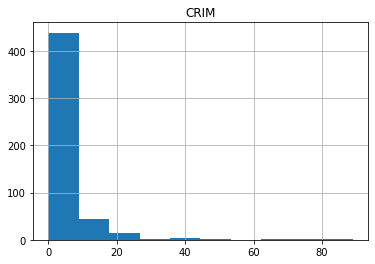

float64


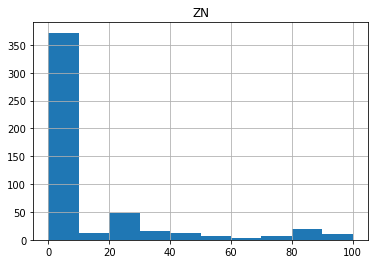

float64


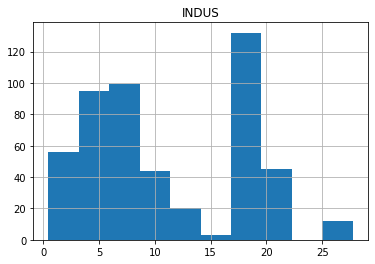

float64


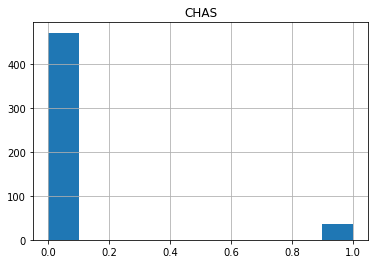

float64


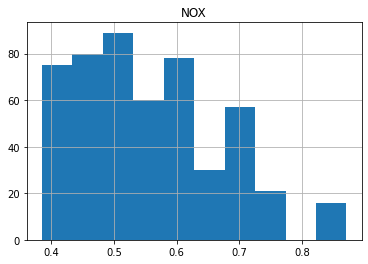

float64


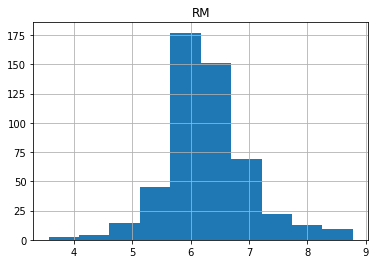

float64


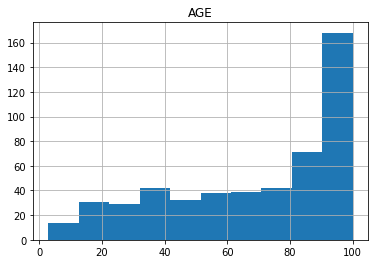

float64


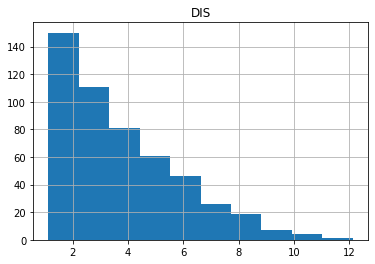

float64


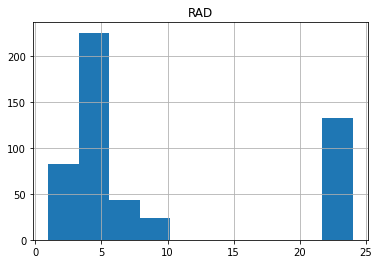

float64


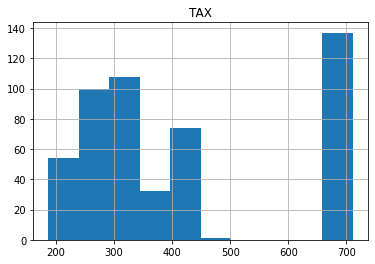

float64


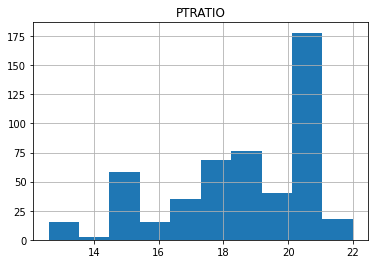

float64


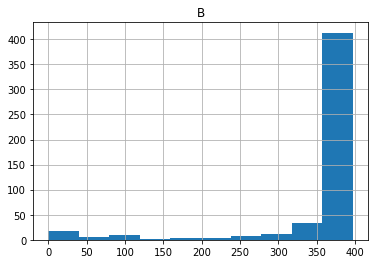

float64


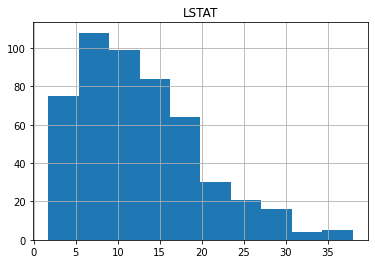

float64


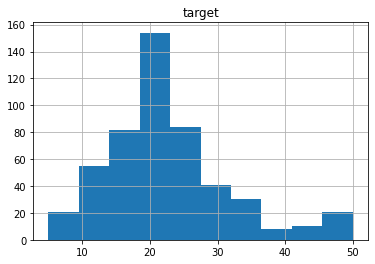

In [ ]:
graficar_variables(df)

In [ ]:
### Número de datos 
df.shape

(506, 14)

In [ ]:
### Funciones necesarias (fuente: https://github.com/gibranfp/CursoAprendizajeAutomatizado/blob/master/notebooks/2b_regularizacion.ipynb)


#### Expansión polinomial (expol)

Definimos la función de expansión polinomial, la cual toma un vector de atributos y calcula cada grado del polinomio con él.


In [ ]:
def expol(X, grado):
  phi_X = X.copy()
  for i in range(grado - 1):
    powerX = np.power(X, i + 2)
    phi_X = np.column_stack((phi_X, powerX))
    
  unos = np.ones(phi_X.shape[0])
  return np.column_stack((unos, phi_X))



Definimos la función para escalar los atributos

In [ ]:
class EscaladoEstandar:
  def fit(self, X):
    self.media = X.mean(axis=0).reshape(1,-1)
    self.std = X.std(axis=0).reshape(1,-1)
    
  def transform(self, X):
    return (X - self.media) / self.std

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)




#### Suma de errores cuadráticos

También definimos la función de errores cuadráticos


In [ ]:
def sse(y, y_hat):
  return np.square(y - y_hat).sum()

def ecm(y, y_hat):
  return np.square(y_hat - y).mean()

#### Mínimos cuadrados

Clase base para regresión lineal al estilo scikit-learn, en la cual se definen únicamente los métodos fit y predict


In [ ]:
class RegresionLineal():
  def fit(self, X, y):
    '''
    Estima los parámetros del modelo
    '''
    self._estima_parametros(X, y)
  
  def predict(self, X):
    '''
    Predice valores de vectores dados
    '''
    return X @ self.parameters

Generamos una clase hija donde se define el método (`_estima_parametros`) con la solución de mínimos cuadrados
$$
\boldsymbol{\theta}_{EMV} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [ ]:
class MinimosCuadrados(RegresionLineal):
  def _estima_parametros(self, X, y):
    self.parameters = np.linalg.inv(X.T @ X) @ (X.T @ y)

In [ ]:
class MinimosCuadradosQR(RegresionLineal):
  def _estima_parametros(self, X, y):
    q, r = np.linalg.qr(X)
    self.parameters = np.linalg.inv(r) @ q.T @ y


Definimos función que entrena y evalúa modelos de regresión dados los datos

In [ ]:
### Se cambió n_ent por len(y_ent) para hacer a la función un poco dinámica

In [ ]:
def entrena_evalua(m, X_ent, y_ent, X_val, y_va, g):
  es = EscaladoEstandar()
  X_ent = expol(es.fit_transform(X_ent), g)
  X_val = expol(es.transform(X_val), g)

  m.fit(X_ent, y_ent)

  y_hat_ent = m.predict(X_ent)
  y_hat_val = m.predict(X_val)

  ecm_ent = ecm(y_ent, y_hat_ent)
  ecm_val = ecm(y_val, y_hat_val) 

  return ecm_ent, ecm_val, m, es



validación cruzada de $K$ particiones

In [ ]:
def vc_kpart(X, y, k = 5):
  n = X.shape[0]
  t_pliegue = int(n / k)
  for i in range(k):
    masc_val = np.zeros(n, dtype=bool)
    masc_val[t_pliegue * i:t_pliegue * (i + 1)] = True
    masc_ent = np.logical_not(masc_val)
    X_ent = X[masc_ent, :]
    y_ent = y[masc_ent]
    X_val = X[masc_val, :]
    y_val = y[masc_val]
    
    yield i, X_ent, y_ent, X_val, y_val

In [ ]:

def vcrep_kpart(X, y, r=10, k=4):
  n = X.shape[0]
  for i in range(r):
    perm = np.random.permutation(n)
    X = X[perm,:]
    y = y[perm]
    t_pliegue = int(n / k) 
    for j in range(k):
      masc_val = np.zeros(n, dtype=bool)
      masc_val[t_pliegue*j:t_pliegue*(j+1)] = True
      masc_ent = np.logical_not(masc_val)
      X_ent = X[masc_ent, :]
      y_ent = y[masc_ent]
      X_val = X[masc_val, :]
      y_val = y[masc_val]
      
      yield i, j, i * k + j , X_ent, y_ent, X_val, y_val



In [ ]:


###

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = df.iloc[:,:-1]
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_


array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05])

Text(0.5, 1.0, 'PCA x vs Y_train')

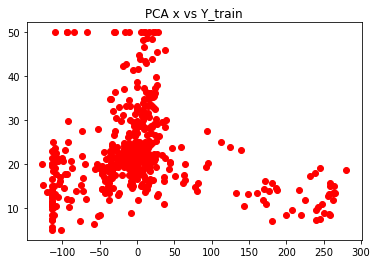

In [ ]:

plt.plot(X_pca[:,1], data.target, "ro")
plt.title("PCA x vs Y_train")

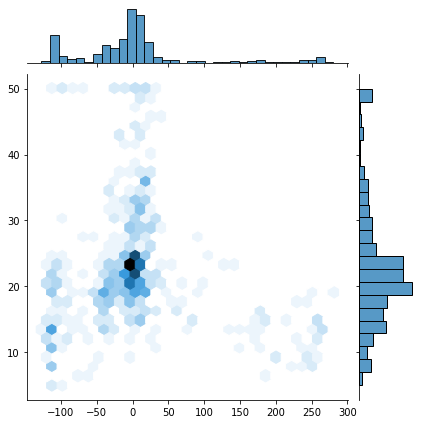

In [ ]:
sns.jointplot( x=X_pca[:,1], y=data.target, kind="hex")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,1], random_state = 100)

In [ ]:
y_train.values

array([  0. ,   0. ,  21. ,   0. ,   0. ,  30. ,   0. ,   0. ,  80. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  55. ,  45. ,
         0. ,   0. ,  20. ,   0. ,   0. ,   0. ,  20. ,   0. ,   0. ,
         0. ,  95. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,  17.5,   0. ,   0. ,  20. ,  80. ,   0. ,   0. ,  55. ,
         0. ,  45. ,  25. ,   0. ,   0. ,   0. ,   0. ,   0. ,  45. ,
         0. ,  60. ,  20. ,   0. ,   0. ,   0. ,   0. ,  20. ,   0. ,
        34. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  40. ,   0. ,   0. ,
        25. ,   0. ,  52.5,  20. ,  22. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,  35. ,   0. ,  25. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,  33. ,   0. ,   0. ,   0. ,   0. ,  30. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  75. ,  20. ,   0. ,
         0. ,   0. ,   0. ,  12.5,   0. ,  80. ,  20. ,   0. ,   0. ,
        80. ,   0. ,

No handles with labels found to put in legend.


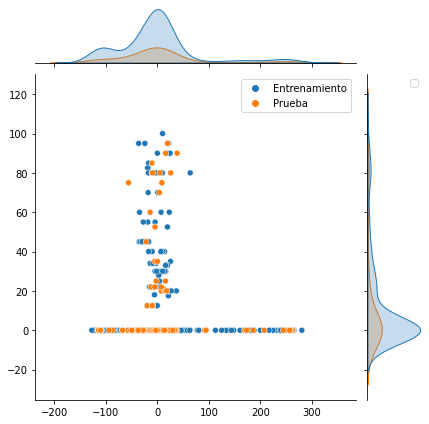

In [ ]:
sns.jointplot( x= np.concatenate([pca.transform(X_train)[:,1], pca.transform(X_test)[:,1]]), y= np.concatenate([y_train.values, y_test.values]),  hue = ["Entrenamiento"] * len(y_train) + ["Prueba"] * len(y_test))
#valid_plot = plt.plot(pca.transform(X_test)[:,1], y_test, 'bo', label = u'Validación')
plt.legend()
plt.show()

In [ ]:
X_ent, X_valid, y_ent, y_valid = train_test_split(X_train, y_train)

In [ ]:
grados = np.array([1,2,4,10,14, 20])
mse_ent_grados = np.zeros(grados.shape[0])
mse_valid_grados = np.zeros(grados.shape[0])

In [ ]:
np.square(2)

4

In [ ]:
# # plt.figure(figsize=(20,15))
# for i,g in enumerate(grados):
#   # plt.subplot(3, 3, i + 1)
#   y_hat_rango, mse_ent_grados[i], mse_valid_grados[i] = entrena_evalua(MinimosCuadradosQR(), 
#                                                                        X_ent, y_ent,
#                                                                        X_valid, y_valid,
#                                                                        X_test, g)
# #   plt.plot(X_ent, y_ent, 'ro', label='Datos de entrenamiento')
# #   plt.plot(X_valid, y_valid, 'go', label='Datos de validación')
# #   plt.plot(X_rango, y_hat_rango, 'b', label='Modelo ajustado')
# #   plt.xlabel('x')
# #   plt.ylabel('y')
# #   plt.title('Grado ' + str(g))
# # plt.show()

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0.0,0.7130,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
46,0.18836,0.0,6.91,0.0,0.4480,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15
50,0.08873,21.0,5.64,0.0,0.4390,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
308,0.49298,0.0,9.90,0.0,0.5440,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
359,4.26131,0.0,18.10,0.0,0.7700,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
323,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [ ]:
grados = np.arange(1,20,1)
ecm_ent_grados = np.zeros((grados.shape[0], 50))
ecm_val_grados = np.zeros((grados.shape[0], 50))
ecm_test_grados =  np.zeros((grados.shape[0]))

for i,g in enumerate(grados):
  for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
    rl = MinimosCuadradosQR()
    ecm_ent_grados[i,l], ecm_val_grados[i,l], m, es = entrena_evalua(rl, X_ent, y_ent,
                                                              X_val, y_val, g)
    ecm_test_grados[i] = ecm(y_test, m.predict(expol(es.transform(X_test), g)))

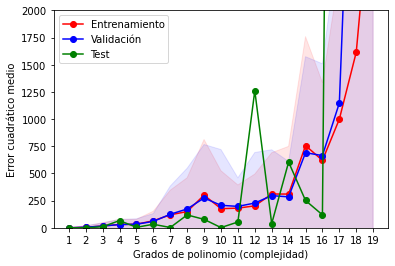

In [ ]:
ent_media_rl = np.mean(ecm_ent_grados, axis=1)
ent_std_rl = np.std(ecm_ent_grados, axis=1)

val_media_rl = np.mean(ecm_val_grados, axis=1)
val_std_rl = np.std(ecm_val_grados, axis=1)
    
plt.fill_between(grados, ent_media_rl - ent_std_rl,
                  ent_media_rl + ent_std_rl, alpha=0.1,
                  color="r")
plt.fill_between(grados, val_media_rl - val_std_rl,
                  val_media_rl + val_std_rl, alpha=0.1,
                  color="b")

plt.plot(grados, ecm_ent_grados.mean(axis=1), 'o-', color="r",
         label="Entrenamiento")
plt.plot(grados, ecm_val_grados.mean(axis=1), 'o-', color="b",
         label=u"Validación")
plt.plot(grados, ecm_test_grados, 'o-', color="g",
         label=u"Test")

plt.xticks(grados)
plt.xlabel('Grados de polinomio (complejidad)')
plt.ylabel('Error cuadrático medio')
plt.ylim([0, 2000])
plt.legend()
plt.show()



In [ ]:
class MinimosCuadradosL2(RegresionLineal):
  def __init__(self, lc = 0.01):
    self._lc = lc

  def _estima_parametros(self, X, y):
    lcI = self._lc * np.identity(X.shape[1])
    self.parameters = np.linalg.inv(lcI + X.T @ X) @ X.T @ y


class MinimosCuadradosL2QR(RegresionLineal):
  def __init__(self, lc = 0.01):
    self._lc = lc

  def _estima_parametros(self, X, y):
    lcI = np.sqrt(self._lc * np.identity(X.shape[1]))
    X_tilde = np.concatenate((X, lcI))
    y_tilde = np.concatenate((y, np.zeros(X.shape[1])))
    q, r = np.linalg.qr(X_tilde)
    self.parameters = np.linalg.inv(r) @ q.T @ y_tilde



In [ ]:
n_exp = 11
lcs = 1/np.power([5]*n_exp,  np.arange(0, n_exp))

In [ ]:
lambdas = np.geomspace(1e-22, 1e20, num=7)
ecm_ent_lambas = np.zeros((lambdas.shape[0], 50))
ecm_val_lambas = np.zeros((lambdas.shape[0], 50))
ecm_test_lambas =  np.zeros((lambdas.shape[0]))
for i, lc in enumerate(lambdas):
  for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
    rl = MinimosCuadradosL2QR(lc = lc)
    ecm_ent_lambas[i,l], ecm_val_lambas[i,l], m, es = entrena_evalua(rl, X_ent, y_ent,
                                                              X_val, y_val, 20)
    ecm_test_lambas[i] = ecm(y_test, m.predict(expol(es.transform(X_test), 20)))

ent_media_rl = np.mean(ecm_ent_lambas, axis=1)
ent_std_rl = np.std(ecm_ent_lambas, axis=1)

val_media_rl = np.mean(ecm_val_lambas, axis=1)
val_std_rl = np.std(ecm_val_lambas, axis=1)


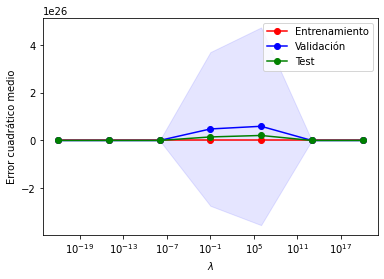

In [ ]:

    
plt.fill_between(lambdas, ent_media_rl - ent_std_rl,
                  ent_media_rl + ent_std_rl, alpha=0.1,
                  color="r")
plt.fill_between(lambdas, val_media_rl - val_std_rl,
                  val_media_rl + val_std_rl, alpha=0.1,
                  color="b")

plt.plot(lambdas, ecm_ent_lambas.mean(axis=1), 'o-', color="r",
        label="Entrenamiento")
plt.plot(lambdas, ecm_val_lambas.mean(axis=1), 'o-', color="b",
        label=u"Validación")
plt.plot(lambdas, ecm_test_lambas, 'o-', color="g",
        label=u"Test")

plt.xticks(lambdas)
plt.xlabel('$\lambda$')
plt.xscale('log')
plt.ylabel('Error cuadrático medio')
#   plt.ylim([0, 2000])
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
lambdas = np.geomspace(1e-22, 1e20, num=7)
ecm_ent_lambas = np.zeros((lambdas.shape[0], 50))
ecm_val_lambas = np.zeros((lambdas.shape[0], 50))
ecm_test_lambas =  np.zeros((lambdas.shape[0]))
for i, lc in enumerate(lambdas):
  for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
    rl = Lasso(alpha=lc, tol=0.08, max_iter = 2000)
    ecm_ent_lambas[i,l], ecm_val_lambas[i,l], m, es = entrena_evalua(rl, X_ent, y_ent,
                                                              X_val, y_val, 20)
    ecm_test_lambas[i] = ecm(y_test, m.predict(expol(es.transform(X_test), 20)))

ent_media_rl = np.mean(ecm_ent_lambas, axis=1)
ent_std_rl = np.std(ecm_ent_lambas, axis=1)

val_media_rl = np.mean(ecm_val_lambas, axis=1)
val_std_rl = np.std(ecm_val_lambas, axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46191.505772685356, tolerance: 13935.156776315791
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48225.44820704051, tolerance: 13323.62710526316
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37501.84199587723, tolerance: 12538.918881578944
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39424.383

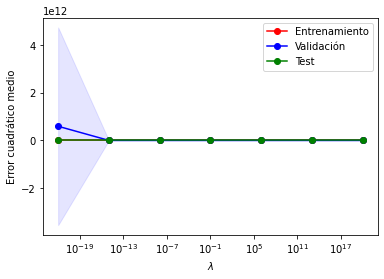

In [ ]:
plt.fill_between(lambdas, ent_media_rl - ent_std_rl,
                  ent_media_rl + ent_std_rl, alpha=0.1,
                  color="r")
plt.fill_between(lambdas, val_media_rl - val_std_rl,
                  val_media_rl + val_std_rl, alpha=0.1,
                  color="b")

plt.plot(lambdas, ecm_ent_lambas.mean(axis=1), 'o-', color="r",
        label="Entrenamiento")
plt.plot(lambdas, ecm_val_lambas.mean(axis=1), 'o-', color="b",
        label=u"Validación")
plt.plot(lambdas, ecm_test_lambas, 'o-', color="g",
        label=u"Test")

plt.xticks(lambdas)
plt.xlabel('$\lambda$')
plt.xscale('log')
plt.ylabel('Error cuadrático medio')
#   plt.ylim([0, 2000])
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
columnas = np.random.choice(X_test.columns, len(X_train.columns))
ecm_ent_columnas = np.zeros((columnas.shape[0], 50))
ecm_val_columnas = np.zeros((columnas.shape[0], 50))
ecm_test_columnas =  np.zeros((columnas.shape[0]))
for i in range(0, len(columnas)):
  for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train[columnas[:(i+1)]].values, y_train.values, r=10, k=5):
    rl = Lasso(alpha=lc, tol=0.08, max_iter = 2000, random_state=100)
    ecm_ent_columnas[i,l], ecm_val_columnas[i,l], m, es = entrena_evalua(rl, X_ent, y_ent,
                                                              X_val, y_val, 2)
    ecm_test_columnas[i] = ecm(y_test, m.predict(expol(es.transform(X_test[columnas[:(i+1)]]), 2)))

ent_media_rl = np.mean(ecm_ent_columnas, axis=1)
ent_std_rl = np.std(ecm_ent_columnas, axis=1)

val_media_rl = np.mean(ecm_val_columnas, axis=1)
val_std_rl = np.std(ecm_val_columnas, axis=1)


In [ ]:
columnas = "_" + columnas 
columnas = np.arange(len(columnas)).astype(str) + columnas


In [ ]:
# columnas = np.arange(len(columnas))

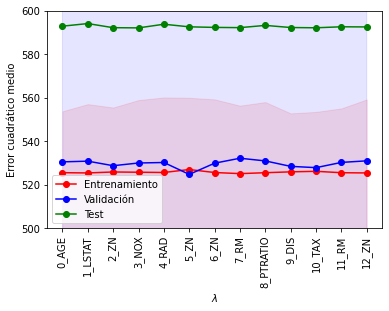

In [ ]:
plt.fill_between(columnas, ent_media_rl - ent_std_rl,
                  ent_media_rl + ent_std_rl, alpha=0.1,
                  color="r")
plt.fill_between(columnas, val_media_rl - val_std_rl,
                  val_media_rl + val_std_rl, alpha=0.1,
                  color="b")

plt.plot(columnas, ecm_ent_columnas.mean(axis=1), 'o-', color="r",
        label="Entrenamiento")
plt.plot(columnas, ecm_val_columnas.mean(axis=1), 'o-', color="b",
        label=u"Validación")
plt.plot(columnas, ecm_test_columnas, 'o-', color="g",
        label=u"Test")

plt.xticks(columnas, rotation = 90)
plt.xlabel('$\lambda$')
plt.ylabel('Error cuadrático medio')
plt.ylim([500, 600])
plt.legend()
plt.show()


## Ejercicio 2

In [ ]:
from scipy.special import logsumexp
from sklearn.metrics import confusion_matrix

In [ ]:
class NBTemplate(object):
  def __init__(self, priors = None):
    self.priors = priors
  
  def __repr__(self):
    return f'{type(self)}(priors={self.priors})'
  
  def predict_proba(self, X, **args):
    return np.exp(self.predict_log_proba(X, **args))
  
  def predict(self, X, log_ = True):
    if isinstance(self, GaussianNB):
      return self.predict_log_proba(X).argmax(axis = 1)
    else:
      return self.predict_proba(X).argmax(axis = 1)#.idxmax().values
  
  def evaluate(self, X, y_true):
      if "values" in dir(y_true):
        y_true = y_true.values
      cm = confusion_matrix(y_true, self.predict(X))
      correctas = np.diag(cm).sum()
      erroneas = cm.sum() - correctas
      return(pd.DataFrame({
          "Correctas":[correctas],
          "Erroneas":[erroneas],
          "Accuracy":[correctas/(correctas+erroneas)],
          "Recall": [cm[1,1]/cm[1,:].sum()]
      }))
    

In [ ]:
class MultinomialNB(NBTemplate):
    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.n_classes_ = len(np.unique(y))
        self.class_count_ = np.zeros(self.n_classes_)
        self.feature_count_ = np.zeros((self.n_classes_, self.n_features_))
        for c in range(self.n_classes_):
            class_rows = y == c
            self.class_count_[c] = class_rows.sum()
            self.feature_count_[c] = X[class_rows].sum(axis=0)
        self.feature_prob_ = self.feature_count_ / self.feature_count_.sum(axis=1, keepdims=True)
        smoothed_fc = self.feature_count_ + 1e-10
        self.feature_log_prob_ = np.log(smoothed_fc) - np.log(smoothed_fc.sum(axis=1, keepdims=True))
        self.priors_ = self.priors if self.priors is not None else self.class_count_ / X.shape[0]
        return self
    
    def predict_log_proba(self, X, normalize=True):
        log_proba = X @ self.feature_log_prob_.T + np.log(self.priors_)
        if normalize:
            log_proba -= logsumexp(log_proba, axis=1, keepdims=True)
        return log_proba

    def summary(self):
      f'Prioris:\n{self.priors_}\nP(X_i|Y):\n{np.exp(smnb.feature_log_prob_).T}'

In [ ]:
class GaussianNB(NBTemplate):
    def fit(self, X, y):
        m, n = X.shape
        self.n_features_ = n
        self.n_classes_ = len(np.unique(y))
        params = {k: np.zeros((self.n_classes_, n)) for k in ('n', 'sumax', 'sumax2')}
        for c in range(self.n_classes_):
            class_rows = y == c
            params['n'][c] = class_rows.sum(axis=0)
            params['sumax'][c] = X[class_rows].sum(axis=0)
            params['sumax2'][c] = np.square(X[class_rows]).sum(axis=0)
        self.priors_ = params['n'].sum(axis=1) / (m*n) if self.priors is None else self.priors
        self.means_ = params['sumax'] / params['n']
        self.vars_ = 1 / params['n'] * (params['sumax2'] - params['n'] * np.square(self.means_)) + 1e-15
        return self
    
    def predict_log_proba(self, X, normalize=True):
        log_proba = np.zeros((X.shape[0], self.n_classes_))
        for c in range(self.n_classes_):
            means, variances = self.means_[c], self.vars_[c]
            log_proba[:, c] = -0.5 * np.log(variances).sum()
            log_proba[:, c] -= 0.5 * np.sum((X - means)**2 / variances, axis=1)
            log_proba[:, c] += np.log(self.priors_[c])
        if normalize:
            log_proba -= logsumexp(log_proba, axis=1, keepdims=True)
        return log_proba
    def summary(self):
        return print(f'Medias:\n{bgnb.means_.T}\nVarianzas:\n{bgnb.vars_.T}\nA prioris:\n{bgnb.priors_}')


In [ ]:
def entrenar_bayes(model, X_ent, y_ent, X_val, y_val):
  model.fit(X_ent, y_ent)
  temporal = model.predict(X_ent)
  return model.evaluate(X_ent, y_ent), model.evaluate(X_val, y_val)

In [ ]:
def entrenar_logistica(model, X_ent, y_ent, X_val, y_val, escalar = True, **args):
  if escalar:
    es = MinMaxScaler()
    X_ent = es.fit_transform(X_ent)
    X_ent = es.transform(X_ent)
  
  ones_ent = np.ones((X_ent.shape[0], 1))
  X_ent = np.column_stack((ones_ent, X_ent))

  ones_val = np.ones(X_val.shape[0])
  X_val = np.column_stack((ones_val, X_val))
  tasa_ap = args.get("tasa_ap", 0.02)
  n_iter = args.get("n_iter", 200)
  ec_iris = model.fit(X_ent, y_ent, n_iter=n_iter, tasa_ap=tasa_ap)
  score_ent = model.score(X_ent, y_ent)
  score_val = model.score(X_val, y_val)
  if escalar:
    return score_ent, score_val, es
  else:
    return score_ent, score_val

## Ejercicio 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train = pd.read_csv("https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_entrenamiento.csv")
data_test = pd.read_csv("https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_prueba.csv")

data_train

,id_blancas,id_negras,ganador
0,3,4,1
1,7,8,1
2,40,10,1
3,16,17,1
4,8,18,1
...,...,...,...
314,80,97,1
315,81,45,0
316,35,43,1
317,87,23,0


int64


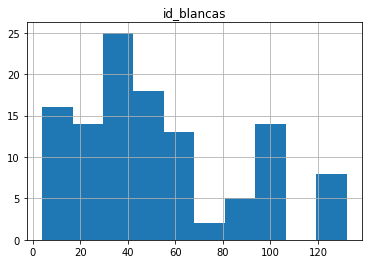

int64


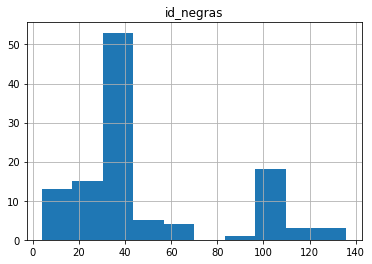

int64


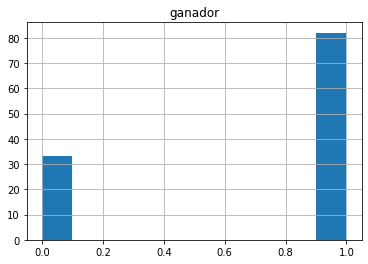

In [ ]:
graficar_variables(data_test)

int64


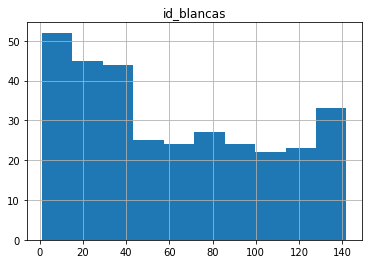

int64


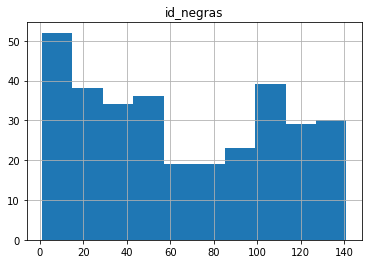

int64


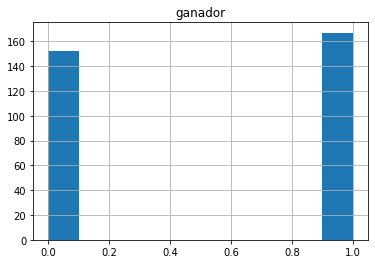

In [ ]:
graficar_variables(data_train)


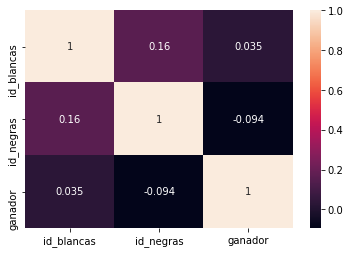

In [ ]:
sns.heatmap(data_train.corr(method="kendall"), annot = True)

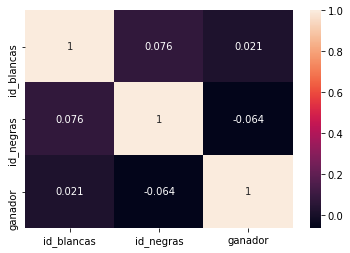

In [ ]:
sns.heatmap(data_test.corr(method="kendall"), annot = True)


In [ ]:
def entropia_cruzada(q, y):
  q[q==0] = np.nextafter(0,1)
  q[q==1] = np.nextafter(1,0)
  return np.sum(-np.log(q[np.nonzero(y)]))

In [ ]:
def softmax(z):
  e_z = np.exp(z - np.max(z, axis = 1)[:, np.newaxis])
  norm = np.sum(e_z, axis = 1)
  return e_z / norm[:, np.newaxis]

In [ ]:
def gradiente(X, Y, Q): 
  return X.T @  (Q - Y)

In [ ]:
def descenso_gradiente(X, y, n_iter, tasa_ap):
  n_ej = X.shape[0]
  d = X.shape[1]
  n_clases = np.unique(y).size
  
  # Codifica clases con vectores 1-de-K
  Y_ohe = np.zeros((n_ej, n_clases))
  Y_ohe[np.arange(n_ej), y] = 1

  # Inicializa parámetros de forma aleatoria ("LeCun uniform")
  lim = np.sqrt(1 / d)
  parametros = np.random.uniform(-lim, lim, size=(d, n_clases))

  ecc = []
  for it in range(n_iter):
    Q = softmax(X @ parametros)
    parametros -= tasa_ap * gradiente(X, Y_ohe, Q)
    ecc.append(entropia_cruzada(Q, Y_ohe))

  return parametros, ecc

In [ ]:
def exactitud(y, y_predicha):
  return (y == y_predicha).mean()

In [ ]:
class RegLogMult:
  def fit(self, X, y, n_iter=1000, tasa_ap=0.001):
    self.parametros_, errores = descenso_gradiente(X, y, n_iter, tasa_ap)
    return errores

  def predict(self, X):
    return softmax(X @ self.parametros_)
  
  def score(self, X, y):
    q = self.predict(X)
    return exactitud(y, np.argmax(q, axis=1))

In [ ]:
## https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

In [ ]:
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X, cut = 50):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > cut else 0 for i in self.sigmoid(z)]
    
    def predict_probas(selg, X):
        z = dot(X, self.weights)
        return z


In [ ]:
spam_df = pd.read_csv("http://turing.iimas.unam.mx/~gibranfp/cursos/aprendizaje_automatizado/data/spam.csv", sep = " ", header = None)
spam_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,3,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
spam_df.isnull().sum().max()

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spam_df.iloc[:,:-1], spam_df.iloc[:,-1], random_state = 100)

In [ ]:
escalar = True
score_ent = np.zeros(50)
score_val = np.zeros(50)
modelos = []
for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
  model = RegLogMult()
  score_ent[l], score_val[l], es = entrenar_logistica(model, X_ent, y_ent,
                                                            X_val, y_val, escalar)
  X_test_new = es.transform(X_test) if escalar else es.transform(X_test)
  ones_test = np.ones((X_test_new.shape[0], 1))
  X_test_new = np.column_stack((ones_test, X_test_new))
  modelos.append(model)



In [ ]:
score_ent = [0] * 50
score_val = [0] * 50
modelos = []
for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
  model = MultinomialNB()
  score_ent[l], score_val[l]= entrenar_bayes(model, X_ent, y_ent, X_val, y_val)
  modelos.append(model)





In [ ]:
cancer_df = pd.read_csv("https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/breast-cancer-wisconsin.data", header = None, na_values="?")

 #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [ ]:
cancer_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
 #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

IndentationError: ignored

In [ ]:
cancer_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

In [ ]:
cancer_df.dropna(inplace=True)
cancer_df.reset_index(inplace = True)

In [ ]:
cancer_df.loc[:,10].replace({2:0, 4:1}, inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,:-1], cancer_df.iloc[:,-1], random_state = 100)

In [ ]:
y_test.unique()

array([0, 1])

In [ ]:
escalar = True
score_ent = np.zeros(50)
score_val = np.zeros(50)
modelos = []
for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
  model = RegLogMult()
  score_ent[l], score_val[l], es = entrenar_logistica(model, X_ent, y_ent,
                                                            X_val, y_val, escalar)
  X_test_new = es.transform(X_test) if escalar else es.transform(X_test)
  ones_test = np.ones((X_test_new.shape[0], 1))
  X_test_new = np.column_stack((ones_test, X_test_new))
  modelos.append(model)



In [ ]:
score_ent = [0] * 50
score_val = [0] * 50
modelos = []
for j,k,l, X_ent, y_ent, X_val, y_val in vcrep_kpart(X_train.values, y_train.values, r=10, k=5):
  model = MultinomialNB()
  score_ent[l], score_val[l]= entrenar_bayes(model, X_ent, y_ent, X_val, y_val)
  modelos.append(model)



